#Problem Statement

###**Predict the Burned Area pf Forest Fire with Neural Networks.**

##**"Your brain does not manufacture thoughts. Your thoughts shape neural networks.” — Deepak Chopra"**

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*LSh88wi-dFEcwEUV_yJ6ZA.png"/>



##Neural network
+ **Neural networks are multi-layer networks of neurons that we use to classify things, make predictions**

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*yGMk1GSKKbyKr_cMarlWnA.jpeg"/>

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras

In [2]:
#Import dataset
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
fd=pd.read_csv("forestfires.csv")

#About the dataset
* **X**: X-axis spatial coordinate within the Montesinho park map: 1 to 9
* **Y**: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **month**: Month of the year: 'jan' to 'dec'
* **day**: Day of the week: 'mon' to 'sun'
* **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* **DMC**: Duff Moisture Code index from the FWI system: 1.1 to 291.3
* **DC**: Drought Code index from the FWI system: 7.9 to 860.6
* **ISI**: Initial Spread Index from the FWI system: 0.0 to 56.10
* **temp**: Temperature in Celsius degrees: 2.2 to 33.30
* **RH**: Relative humidity in percentage: 15.0 to 100
* **wind**: Wind speed in km/h: 0.40 to 9.40
* **rain**: Outside rain in mm/m2 : 0.0 to 6.4
* **area**: The burned area of the forest (in ha): 0.00 to 1090.84

In [4]:
fd

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


##**Data understanding**

In [6]:
fd.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
fd.shape

(517, 31)

In [9]:
fd.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
fd[fd.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
fd = fd.drop(['month', 'day'], axis=1)
fd.head()
X = fd.drop("size_category", axis=1)

In [12]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = pd.DataFrame({"size_category":fd.iloc[:,-1]})
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [14]:
y.value_counts()/len(y)

size_category
small            0.731141
large            0.268859
Name: count, dtype: float64

###**It can be seen that small catagory is almost 73% and large is 26%, so handling this imblace by resampling**

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [16]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(X,y)

In [17]:
print(x_resampled.shape)

(756, 28)


In [18]:
print(y_resampled.shape)

(756, 1)


In [19]:
y_resampled['size_category'] = y_resampled['size_category'].map({"small":0, "large":1})

##**Train-Test Split**

In [49]:
# Using Test Train split and applying Standard Scaler on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [22]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [23]:
# Initialising ANN
classifier = Sequential()

# Adding the input Layer and first hidden layer
classifier.add(Dense(units=10, kernel_initializer="he_uniform", activation="relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=15, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])

In [24]:
# Fitting the ANN on training data set
model_history = classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 5s 18ms/step - loss: 1.0327 - accuracy: 0.5162 - val_loss: 0.8707 - val_accuracy: 0.4843
Epoch 2/100
37/37 [==============================] - 0s 10ms/step - loss: 0.8553 - accuracy: 0.5216 - val_loss: 0.7933 - val_accuracy: 0.4591
Epoch 3/100
37/37 [==============================] - 0s 9ms/step - loss: 0.8456 - accuracy: 0.5162 - val_loss: 0.7462 - val_accuracy: 0.4906
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 0.8178 - accuracy: 0.5081 - val_loss: 0.7283 - val_accuracy: 0.5094
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 0.8037 - accuracy: 0.4892 - val_loss: 0.7129 - val_accuracy: 0.5220
Epoch 6/100
37/37 [==============================] - 0s 7ms/step - loss: 0.7689 - accuracy: 0.5081 - val_loss: 0.7091 - val_accuracy: 0.5283
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.7963 - accuracy: 0.4595 - val_loss: 0.7052 - val_accuracy: 0.5346
Epoch 8/100

In [25]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


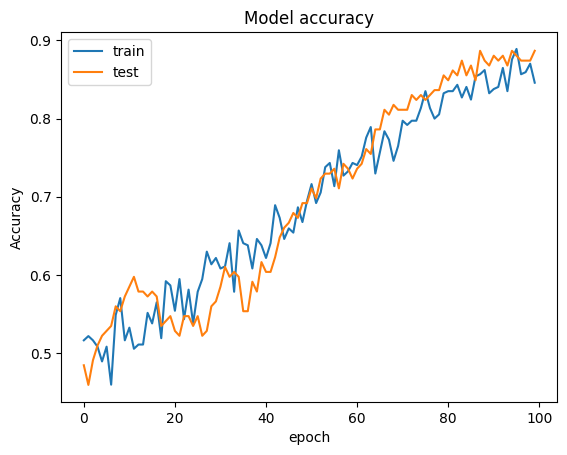

In [26]:
# Summary of History for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch')
plt.legend(['train', "test"], loc="upper left")
plt.show()

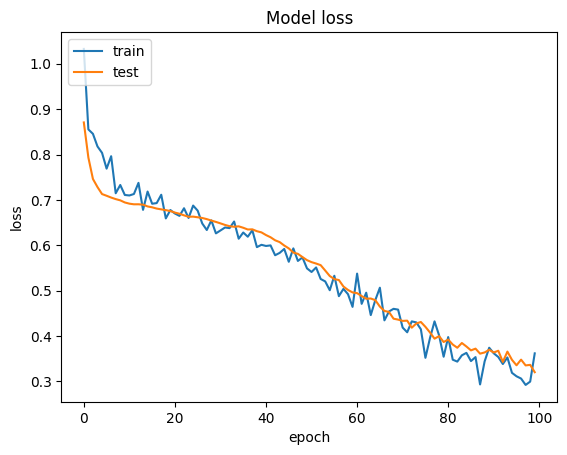

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper left")
plt.show()

In [28]:
# Predicting the test
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

8/8 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
confusion_matrix(y_test , y_pred)

array([[102,  19],
       [ 22,  84]])

In [31]:
accuracy_score(y_test, y_pred)

0.8193832599118943

##**Optimizing the parameters using eras tuner**

In [32]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [33]:
from keras_tuner import RandomSearch
from tensorflow.keras import layers

##**HYPERAMETER TUNING: Optimal learning rate, Number of neurons and neurons**

### Neuron
**Neurons are the basic unit of a neural network. ... When the artificial neuron activates, it computes its state, by adding all the incoming inputs multiplied by its corresponding connection weight. But neurons always have one extra input, the bias, which is always 1, and has its own connection weight.**

###**Gradient Descent OPtimizer**

* GradientDescentOptimizer: It makes the best result with the least error
* There are lots of optimizer methods provided in tensorflow. (GradientDescent, Adam, RMSProp, etc.)
* learning rate : It indicates the degree of descending size.

<img src="https://cdn-images-1.medium.com/max/1600/1*jNyE54fTVOH1203IwYeNEg.png"/>



In [34]:
def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Flatten())
  for i in range(hp.Int("num_layers", 2,20)):
      model.add(
          layers.Dense(
              units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
              activation='relu'
          )
      )
  model.add(layers.Dense(10, activation="softmax"))
  model.compile(
      optimizer=keras.optimizers.Adam(
          learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3])
      ),
      loss=keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )
  return model

In [35]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    overwrite=True,
    directory='my_dir',
    project_name='helloworld',
)

In [36]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Trial 2 Complete [00h 00m 59s]
val_accuracy: 0.5330396294593811

Best val_accuracy So Far: 0.8546255230903625
Total elapsed time: 00h 01m 22s


In [37]:
classifier1=Sequential()
classifier1.add(Dense(160, input_dim=28, activation ='relu'))
classifier1.add(Dense(32,activation='relu'))
classifier1.add(Dense(1,activation='sigmoid'))

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
optimizer = Adam(learning_rate=0.001)

In [40]:
classifier1.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

In [41]:
modela_history1 = classifier1.fit(X_train, y_train, validation_split=0.3, batch_size=10,epochs=15)

Epoch 1/15
37/37 [==============================] - 2s 15ms/step - loss: 0.6753 - accuracy: 0.5838 - val_loss: 0.6287 - val_accuracy: 0.6730
Epoch 2/15
37/37 [==============================] - 0s 6ms/step - loss: 0.5920 - accuracy: 0.7081 - val_loss: 0.5869 - val_accuracy: 0.7170
Epoch 3/15
37/37 [==============================] - 0s 6ms/step - loss: 0.5473 - accuracy: 0.7622 - val_loss: 0.5608 - val_accuracy: 0.7044
Epoch 4/15
37/37 [==============================] - 0s 6ms/step - loss: 0.5066 - accuracy: 0.7865 - val_loss: 0.5246 - val_accuracy: 0.7107
Epoch 5/15
37/37 [==============================] - 0s 7ms/step - loss: 0.4637 - accuracy: 0.8351 - val_loss: 0.4981 - val_accuracy: 0.7484
Epoch 6/15
37/37 [==============================] - 0s 6ms/step - loss: 0.4246 - accuracy: 0.8514 - val_loss: 0.4761 - val_accuracy: 0.7736
Epoch 7/15
37/37 [==============================] - 0s 6ms/step - loss: 0.3885 - accuracy: 0.8757 - val_loss: 0.4396 - val_accuracy: 0.8113
Epoch 8/15
37/37 [=

In [42]:
# Predicting the test
y_pred1 = classifier1.predict(X_test)
y_pred1 = (y_pred1 >= 0.5)

8/8 [==============================] - 0s 2ms/step


In [43]:
accuracy_score(y_test, y_pred1)

0.7973568281938326

In [44]:
accuracy_score(y_test, y_pred1)

0.7973568281938326

In [47]:
y_pred2 = classifier1.predict(X_train)
y_pred2 = (y_pred2 >= 0.5)

17/17 [==============================] - 0s 8ms/step


In [48]:
accuracy_score(y_train, y_pred2)

0.9187145557655955